## IPL First Innings Score Prediction

In [1]:
# Importing essential libraries
import pandas as pd
import pickle
import datetime

In [2]:
# Import the Dataset
df = pd.read_csv("F:/Python Data Science/Krish Naik/Machine Learning Projects/Datasets/ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# See some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
# Check for the null values
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
# Remove unwanted columns
columns_to_remove = ["mid", "bowler"]
df.drop(columns_to_remove, axis=1, inplace=True)

In [6]:
# See the names of all the teams
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
# Keep only consistent teams

consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
df['bat_team'].value_counts()

Mumbai Indians                 8461
Kings XI Punjab                7889
Chennai Super Kings            7536
Royal Challengers Bangalore    6843
Kolkata Knight Riders          6300
Rajasthan Royals               6038
Delhi Daredevils               6022
Sunrisers Hyderabad            4722
Name: bat_team, dtype: int64

In [8]:
# Converting 'date' columns to datetype
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Extract year feature from datetime
years = df['date'].dt.year


In [9]:
# Let's add 'year' column to dataframe

df['year'] = years

In [10]:
# Drop the 'date' column
df.drop('date', axis=1, inplace=True)

In [11]:
df.head()

,venue,bat_team,bowl_team,batsman,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,1,0,0.1,1,0,0,0,222,2008
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,1,0,0.2,1,0,0,0,222,2008
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,2,0,0.2,2,0,0,0,222,2008
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,2,0,0.3,2,0,0,0,222,2008
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,2,0,0.4,2,0,0,0,222,2008


In [12]:
# Check for Number of categories in categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

categorical_features

['venue', 'bat_team', 'bowl_team', 'batsman']

In [13]:
# Check the number of venues
df['venue'].value_counts().shape

(31,)

In [14]:
# Check the number of Batsman
df['batsman'].value_counts().shape

(349,)

In [15]:
# Converting the categorical features using one hot encoding
# We'll one hot encode only 'bat_team' and 'bowl_team' as they contain only few categories

df = pd.get_dummies(data = df, columns=['bat_team', 'bowl_team'], drop_first=True)

In [16]:
df.head()

,venue,batsman,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,M Chinnaswamy Stadium,SC Ganguly,1,0,0.1,1,0,0,0,222,...,0,0,0,0,0,0,0,0,1,0
1,M Chinnaswamy Stadium,BB McCullum,1,0,0.2,1,0,0,0,222,...,0,0,0,0,0,0,0,0,1,0
2,M Chinnaswamy Stadium,BB McCullum,2,0,0.2,2,0,0,0,222,...,0,0,0,0,0,0,0,0,1,0
3,M Chinnaswamy Stadium,BB McCullum,2,0,0.3,2,0,0,0,222,...,0,0,0,0,0,0,0,0,1,0
4,M Chinnaswamy Stadium,BB McCullum,2,0,0.4,2,0,0,0,222,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Let's do mean encoding to venue since it has many categories
# Make a dictionary
mean_encode = df.groupby(["venue"])['total'].mean().to_dict()
mean_encode

{'Barabati Stadium': 173.86559139784947,
 'Brabourne Stadium': 180.7125796178344,
 'Buffalo Park': 131.75,
 'De Beers Diamond Oval': 140.0,
 'Dr DY Patil Sports Academy': 157.98837209302326,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 160.0356564019449,
 'Dubai International Cricket Stadium': 148.99308755760367,
 'Eden Gardens': 157.10220903395978,
 'Feroz Shah Kotla': 163.71937521937522,
 'Himachal Pradesh Cricket Association Stadium': 173.04036908881199,
 'Holkar Cricket Stadium': 173.4,
 'JSCA International Stadium Complex': 145.3868715083799,
 'Kingsmead': 146.91056910569105,
 'M Chinnaswamy Stadium': 166.969386038688,
 'MA Chidambaram Stadium, Chepauk': 167.34102769971898,
 'Maharashtra Cricket Association Stadium': 165.5199203187251,
 'New Wanderers Stadium': 142.95799676898224,
 'Newlands': 146.64587525150907,
 'OUTsurance Oval': 134.8207171314741,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 164.2602880658436,
 'Punjab Cricket Association Stadium, Mohali

In [18]:
# Map the dictionary back to the dataframe
df['venue_mean_encode'] = df['venue'].map(mean_encode)

In [19]:
df[['venue', 'venue_mean_encode']].head()

,venue,venue_mean_encode
0,M Chinnaswamy Stadium,166.969386
1,M Chinnaswamy Stadium,166.969386
2,M Chinnaswamy Stadium,166.969386
3,M Chinnaswamy Stadium,166.969386
4,M Chinnaswamy Stadium,166.969386


In [20]:
# Drop the 'venue' column
df.drop("venue", axis=True, inplace=True)

In [21]:
df.head()

,batsman,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_mean_encode
0,SC Ganguly,1,0,0.1,1,0,0,0,222,2008,...,0,0,0,0,0,0,0,1,0,166.969386
1,BB McCullum,1,0,0.2,1,0,0,0,222,2008,...,0,0,0,0,0,0,0,1,0,166.969386
2,BB McCullum,2,0,0.2,2,0,0,0,222,2008,...,0,0,0,0,0,0,0,1,0,166.969386
3,BB McCullum,2,0,0.3,2,0,0,0,222,2008,...,0,0,0,0,0,0,0,1,0,166.969386
4,BB McCullum,2,0,0.4,2,0,0,0,222,2008,...,0,0,0,0,0,0,0,1,0,166.969386


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53811 entries, 0 to 75888
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   batsman                                53811 non-null  object 
 1   runs                                   53811 non-null  int64  
 2   wickets                                53811 non-null  int64  
 3   overs                                  53811 non-null  float64
 4   runs_last_5                            53811 non-null  int64  
 5   wickets_last_5                         53811 non-null  int64  
 6   striker                                53811 non-null  int64  
 7   non-striker                            53811 non-null  int64  
 8   total                                  53811 non-null  int64  
 9   year                                   53811 non-null  int64  
 10  bat_team_Delhi Daredevils              53811 non-null  uint8  
 11  ba

In [23]:
# Let's do mean encoding to 'batsman' column, since it has many categories

# Make a dictionary
#mean_encode_batsman = df.groupby(["batsman"])['total'].mean().to_dict()
#mean_encode_batsman

{'A Ashish Reddy': 145.9506172839506,
 'A Chandila': 117.0,
 'A Chopra': 122.48148148148148,
 'A Flintoff': 179.0,
 'A Kumble': 139.6875,
 'A Mishra': 130.88571428571427,
 'A Mithun': 169.0,
 'A Mukund': 171.0,
 'A Nehra': 136.21428571428572,
 'A Singh': 91.0,
 'A Symonds': 135.75757575757575,
 'A Uniyal': 141.0,
 'AA Chavan': 141.0,
 'AA Jhunjhunwala': 146.25,
 'AB Agarkar': 123.2,
 'AB Dinda': 102.13333333333334,
 'AB McDonald': 166.859649122807,
 'AB de Villiers': 172.15355450236967,
 'AC Blizzard': 178.0,
 'AC Gilchrist': 162.11111111111111,
 'AC Voges': 160.45454545454547,
 'AD Mascarenhas': 140.68085106382978,
 'AD Mathews': 164.02551020408163,
 'AD Russell': 164.3135593220339,
 'AF Milne': 162.0,
 'AG Murtaza': 94.0,
 'AG Paunikar': 123.73529411764706,
 'AJ Finch': 160.06514657980455,
 'AL Menaria': 150.21052631578948,
 'AM Nayar': 156.9704433497537,
 'AM Rahane': 168.2122969837587,
 'AN Ahmed': 166.0,
 'AN Ghosh': 173.0,
 'AP Tare': 159.1032258064516,
 'AR Bawne': 160.0,
 'AR P

In [24]:
# Map the dictionary back to the dataframe
#df['batsman_mean_encode'] = df['batsman'].map(mean_encode_batsman)

In [25]:
#df[['batsman', 'batsman_mean_encode']]

,batsman,batsman_mean_encode
0,SC Ganguly,155.522500
1,BB McCullum,172.021303
2,BB McCullum,172.021303
3,BB McCullum,172.021303
4,BB McCullum,172.021303
...,...,...
75884,UT Yadav,104.521739
75885,UT Yadav,104.521739
75886,AS Rajpoot,107.000000
75887,AS Rajpoot,107.000000


In [23]:
# Drop the 'Batsman' column
df.drop("batsman", axis=True, inplace=True)

In [24]:
df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_mean_encode
0,1,0,0.1,1,0,0,0,222,2008,0,...,0,0,0,0,0,0,0,1,0,166.969386
1,1,0,0.2,1,0,0,0,222,2008,0,...,0,0,0,0,0,0,0,1,0,166.969386
2,2,0,0.2,2,0,0,0,222,2008,0,...,0,0,0,0,0,0,0,1,0,166.969386
3,2,0,0.3,2,0,0,0,222,2008,0,...,0,0,0,0,0,0,0,1,0,166.969386
4,2,0,0.4,2,0,0,0,222,2008,0,...,0,0,0,0,0,0,0,1,0,166.969386


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53811 entries, 0 to 75888
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   runs                                   53811 non-null  int64  
 1   wickets                                53811 non-null  int64  
 2   overs                                  53811 non-null  float64
 3   runs_last_5                            53811 non-null  int64  
 4   wickets_last_5                         53811 non-null  int64  
 5   striker                                53811 non-null  int64  
 6   non-striker                            53811 non-null  int64  
 7   total                                  53811 non-null  int64  
 8   year                                   53811 non-null  int64  
 9   bat_team_Delhi Daredevils              53811 non-null  uint8  
 10  bat_team_Kings XI Punjab               53811 non-null  uint8  
 11  ba

In [26]:
# Splitting the data into train and test set

# Independent Variable
X_train = df.drop(labels='total', axis=1)[df['year'] <= 2016]
X_test = df.drop(labels='total', axis=1)[df['year'] >= 2017]

In [27]:
X_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,year,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_mean_encode
0,1,0,0.1,1,0,0,0,2008,0,0,...,0,0,0,0,0,0,0,1,0,166.969386
1,1,0,0.2,1,0,0,0,2008,0,0,...,0,0,0,0,0,0,0,1,0,166.969386
2,2,0,0.2,2,0,0,0,2008,0,0,...,0,0,0,0,0,0,0,1,0,166.969386
3,2,0,0.3,2,0,0,0,2008,0,0,...,0,0,0,0,0,0,0,1,0,166.969386
4,2,0,0.4,2,0,0,0,2008,0,0,...,0,0,0,0,0,0,0,1,0,166.969386


In [28]:
X_test.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,year,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_mean_encode
68862,0,0,0.1,0,0,0,0,2017,0,0,...,0,1,0,0,0,0,0,1,0,157.699296
68863,0,0,0.2,0,0,0,0,2017,0,0,...,0,1,0,0,0,0,0,1,0,157.699296
68864,4,0,0.3,4,0,4,0,2017,0,0,...,0,1,0,0,0,0,0,1,0,157.699296
68865,4,0,0.4,4,0,4,0,2017,0,0,...,0,1,0,0,0,0,0,1,0,157.699296
68866,6,0,0.4,6,0,4,0,2017,0,0,...,0,1,0,0,0,0,0,1,0,157.699296


In [29]:
# Dependent Variable
y_train = df[df['year'] <= 2016]['total']
y_test = df[df['year'] >= 2017]['total']

In [30]:
y_train.head()

0    222
1    222
2    222
3    222
4    222
Name: total, dtype: int64

In [31]:
y_test.head()

68862    207
68863    207
68864    207
68865    207
68866    207
Name: total, dtype: int64

In [32]:
# Model Building

# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the Linear Regression Model
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
# See the Linear Regression model score
regressor.score(X_train, y_train)

0.5367734432925992

In [34]:
# Make prediction with Linear Regression Model
prediction = regressor.predict(X_test)

In [35]:
# See the Linear Regression Prediction Score
regressor.score(X_test, y_test)

0.5968565428701975

In [36]:
# See some metrics
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 14.909230548072209
MSE: 413.6706510499401
RMSE: 20.33889503021096


In [37]:
# Check the R Square
metrics.r2_score(y_test, prediction)

0.5968565428701975

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


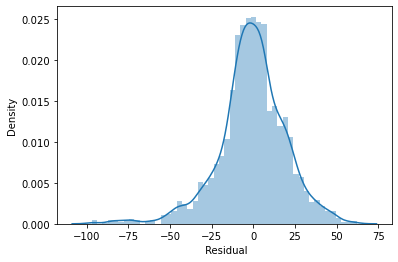

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the Linear Regression Prediction Residuals
sns.distplot(y_test-prediction)
plt.xlabel(" Residual")
plt.show()

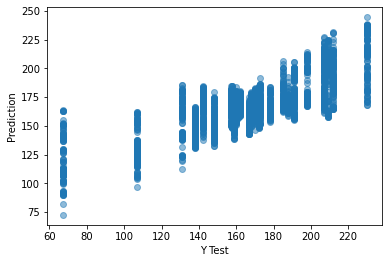

In [39]:
# Plot original values vs Linear Regression Prediction values
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel("Y Test")
plt.ylabel("Prediction")
plt.show()

## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [41]:
lasso = Lasso()

# Set different Alpha values
parameters = { 'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

# Do Lasso modelling with GridSearchCV Hyperparameter Tuning
lasso_regressor = GridSearchCV(lasso, parameters, scoring="r2", cv=5)

In [42]:
# Fit the Lasso Regression Model
lasso_regressor.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.760e+06, tolerance: 3.436e+03
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.865e+06, tolerance: 3.455e+03
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.203e+06, tolerance: 3.634e+03
  model = cd_fast.enet_coo

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='r2')

In [43]:
print(f"Best Parameters : {lasso_regressor.best_params_}")
print(f"Lasso Model Best Score : {lasso_regressor.best_score_}")

Best Parameters : {'alpha': 1}
Lasso Model Best Score : 0.5051284460903863


In [44]:
# Do Lasso regression Prediction
prediction1 = lasso_regressor.predict(X_test)

In [45]:
print(f"Lasso Prediction Score : {lasso_regressor.score(X_test, y_test)}")
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('MSE:', metrics.mean_squared_error(y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))
print(f"R_square : {metrics.r2_score(y_test, prediction1)}")

Lasso Prediction Score : 0.5914311371100611
MAE: 14.741997428478408
MSE: 419.23772920366804
RMSE: 20.4752955828156
R_square : 0.5914311371100611


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


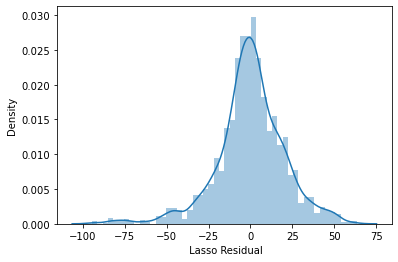

In [46]:
# Plot Lasso Regression Prediction Residuals
sns.distplot(y_test-prediction1)
plt.xlabel(" Lasso Residual")
plt.show()

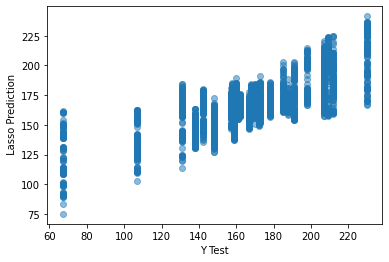

In [47]:
# Plot Original Values vs Lasso Prediction Values
plt.scatter(y_test, prediction1, alpha=0.5)
plt.xlabel("Y Test")
plt.ylabel(" Lasso Prediction")
plt.show()

## Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge = Ridge()

# Set different Alpha values
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

# Do ridge Regression modelling with GridSearchCV 
ridge_regressor = GridSearchCV(ridge, parameters, scoring="r2", cv=5)

# Fit the Ridge Regression Model
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='r2')

In [50]:
print(f"Best Parameters : {ridge_regressor.best_params_}")
print(f"Ridge Model Best Score : {ridge_regressor.best_score_}")

Best Parameters : {'alpha': 40}
Ridge Model Best Score : 0.48210898876689134


In [51]:
# Do Prediction with Ridge Regression
prediction2 = ridge_regressor.predict(X_test)

In [52]:
print(f"Ridge Prediction Score : {ridge_regressor.score(X_test, y_test)}")
print('MAE:', metrics.mean_absolute_error(y_test, prediction2))
print('MSE:', metrics.mean_squared_error(y_test, prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))
print(f"R_square : {metrics.r2_score(y_test, prediction2)}")

Ridge Prediction Score : 0.5969148494135019
MAE: 14.90610689667852
MSE: 413.61082196105707
RMSE: 20.33742417222636
R_square : 0.5969148494135019


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


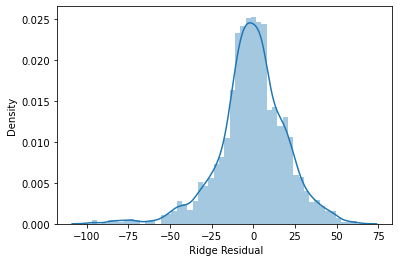

In [53]:
# Plot Ridge Regression Prediction Residuals
sns.distplot(y_test-prediction2)
plt.xlabel(" Ridge Residual")
plt.show()

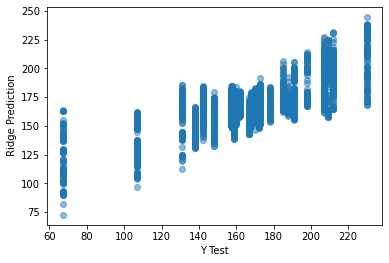

In [54]:
# Plot Original Values vs Ridge Prediction Values
plt.scatter(y_test, prediction2, alpha=0.5)
plt.xlabel("Y Test")
plt.ylabel(" Ridge Prediction")
plt.show()

In [55]:
# Since Linear Regression is performing well, we'll pickle it
# Creating a pickle file for the classifier
filename = 'iplmodel.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [56]:
pd.set_option('display.max_columns', 24)

In [57]:
X_test.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,year,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_mean_encode
68862,0,0,0.1,0,0,0,0,2017,0,0,0,0,0,0,1,0,0,0,0,0,1,0,157.699296
68863,0,0,0.2,0,0,0,0,2017,0,0,0,0,0,0,1,0,0,0,0,0,1,0,157.699296
68864,4,0,0.3,4,0,4,0,2017,0,0,0,0,0,0,1,0,0,0,0,0,1,0,157.699296
68865,4,0,0.4,4,0,4,0,2017,0,0,0,0,0,0,1,0,0,0,0,0,1,0,157.699296
68866,6,0,0.4,6,0,4,0,2017,0,0,0,0,0,0,1,0,0,0,0,0,1,0,157.699296


In [66]:
X_test.columns.to_series()

runs                                                                      runs
wickets                                                                wickets
overs                                                                    overs
runs_last_5                                                        runs_last_5
wickets_last_5                                                  wickets_last_5
striker                                                                striker
non-striker                                                        non-striker
year                                                                      year
bat_team_Delhi Daredevils                            bat_team_Delhi Daredevils
bat_team_Kings XI Punjab                              bat_team_Kings XI Punjab
bat_team_Kolkata Knight Riders                  bat_team_Kolkata Knight Riders
bat_team_Mumbai Indians                                bat_team_Mumbai Indians
bat_team_Rajasthan Royals                           

In [80]:
l = [22, 2, 5, 22, 2, 11, 11, 2016, 0,0,0,0,0,1,0,  0,0,0,1,0,0,0, 166.969386 , 155.522500]

data = np.array([l])

data[0]

array([2.20000000e+01, 2.00000000e+00, 5.00000000e+00, 2.20000000e+01,
       2.00000000e+00, 1.10000000e+01, 1.10000000e+01, 2.01600000e+03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.66969386e+02, 1.55522500e+02])

In [81]:
regressor.predict(data)[0]

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


143.0494967352221